https://featuretools.alteryx.com/en/stable/guides/time_series.html

In [17]:
import featuretools as ft
import pandas as pd
from featuretools.demo import load_weather

In [11]:
ft.__version__

'1.11.1'

In [5]:
es = load_weather()

In [8]:
# df = load_weather(return_single_table=True)

In [7]:
es['temperatures']

,id,Date,Temp
0,0,1981-01-01,20.7
1,1,1981-01-02,17.9
2,2,1981-01-03,18.8
3,3,1981-01-04,14.6
4,4,1981-01-05,15.8
...,...,...,...
3645,3645,1990-12-27,14.0
3646,3646,1990-12-28,13.6
3647,3647,1990-12-29,13.5
3648,3648,1990-12-30,15.7


In [9]:
type(es['temperatures'])

pandas.core.frame.DataFrame

<AxesSubplot:ylabel='Temp (C)'>

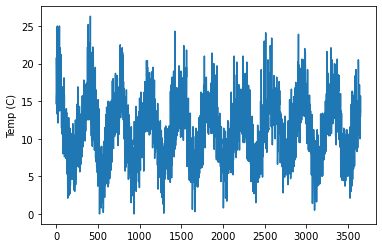

In [12]:
es["temperatures"]["Temp"].plot(ylabel="Temp (C)")

In [13]:
split_point = int(df.shape[0]*.7)

training_data = df[:split_point]
test_data = df[split_point:]

In [14]:
gap = 7
window_length = 5

## Time Series Primitives

In [22]:
from featuretools.primitives.standard.transform_primitive import NumericLag
from featuretools.primitives import RollingMean, RollingMin

### Datetime Transform Primitives

In [15]:
datetime_primitives = ["Day", "Year", "Weekday", "Month"]

### Delaying Primitives

In [18]:
delaying_primitives = [NumericLag(periods=i + gap) for i in range(window_length)]

In [21]:
delaying_primitives

### Rolling Transform Primitives

when using primitives for time series feature engineering, one must be incredibly careful to not use primitives on the target column that incorporate the current observation when calculating a feature value.

In [23]:
rolling_mean_primitive = RollingMean(
    window_length=window_length, gap=gap, min_periods=window_length
)

rolling_min_primitive = RollingMin(
    window_length=window_length, gap=gap, min_periods=window_length
)

In [24]:
rolling_mean_primitive

In [25]:
fm, f = ft.dfs(
    entityset=es,
    target_dataframe_name="temperatures",
    trans_primitives=(
        datetime_primitives
        + delaying_primitives
        + [rolling_mean_primitive, rolling_min_primitive]
    ),
    cutoff_time=pd.Timestamp("1987-1-30"),
)

f

/home/takadevbook/miniconda3/envs/feature-engineering/lib/python3.10/site-packages/featuretools/synthesis/deep_feature_synthesis.py:161: UserWarning: Only one dataframe in entityset, changing max_depth to 1 since deeper features cannot be created
  warnings.warn(


[<Feature: Temp>,
 <Feature: DAY(Date)>,
 <Feature: MONTH(Date)>,
 <Feature: NUMERIC_LAG(Date, Temp, periods=10)>,
 <Feature: NUMERIC_LAG(Date, Temp, periods=11)>,
 <Feature: NUMERIC_LAG(Date, Temp, periods=7)>,
 <Feature: NUMERIC_LAG(Date, Temp, periods=8)>,
 <Feature: NUMERIC_LAG(Date, Temp, periods=9)>,
 <Feature: ROLLING_MEAN(Date, Temp, window_length=5, gap=7, min_periods=5)>,
 <Feature: ROLLING_MIN(Date, Temp, window_length=5, gap=7, min_periods=5)>,
 <Feature: WEEKDAY(Date)>,
 <Feature: YEAR(Date)>]

In [26]:
fm.iloc[:, [0, 2, 6, 7, 8, 9]].head(15)

,Temp,MONTH(Date),"NUMERIC_LAG(Date, Temp, periods=8)","NUMERIC_LAG(Date, Temp, periods=9)","ROLLING_MEAN(Date, Temp, window_length=5, gap=7, min_periods=5)","ROLLING_MIN(Date, Temp, window_length=5, gap=7, min_periods=5)"
id,,,,,,
0,20.7,1,NaN,NaN,NaN,NaN
1,17.9,1,NaN,NaN,NaN,NaN
2,18.8,1,NaN,NaN,NaN,NaN
3,14.6,1,NaN,NaN,NaN,NaN
4,15.8,1,NaN,NaN,NaN,NaN
5,15.8,1,NaN,NaN,NaN,NaN
6,15.8,1,NaN,NaN,NaN,NaN
7,17.4,1,NaN,NaN,NaN,NaN
8,21.8,1,20.7,NaN,NaN,NaN


In [31]:
cols = [1,2,10,11,0,5,6,7,3,4,8,9]
fm.iloc[:, cols].head(15)

,DAY(Date),MONTH(Date),WEEKDAY(Date),YEAR(Date),Temp,"NUMERIC_LAG(Date, Temp, periods=7)","NUMERIC_LAG(Date, Temp, periods=8)","NUMERIC_LAG(Date, Temp, periods=9)","NUMERIC_LAG(Date, Temp, periods=10)","NUMERIC_LAG(Date, Temp, periods=11)","ROLLING_MEAN(Date, Temp, window_length=5, gap=7, min_periods=5)","ROLLING_MIN(Date, Temp, window_length=5, gap=7, min_periods=5)"
id,,,,,,,,,,,,
0,1,1,3,1981,20.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,4,1981,17.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,5,1981,18.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,6,1981,14.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,0,1981,15.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,1,1,1981,15.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,1,2,1981,15.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,1,3,1981,17.4,20.7,NaN,NaN,NaN,NaN,NaN,NaN
8,9,1,4,1981,21.8,17.9,20.7,NaN,NaN,NaN,NaN,NaN
